<a href="https://colab.research.google.com/github/AYUSH-11/AYUSH-11.github.io/blob/master/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive  #to import Google drive data
from keras.models import load_model

In [ ]:
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/ER"

/content/drive/My Drive/Colab Notebooks/ER


In [ ]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(
    'train',
    target_size=(48,48),
    batch_size = 64,
    color_mode='rgb',
    class_mode='categorical')
val_set = val_img_datagen.flow_from_directory(
    'test',
    target_size=(48,48),
    batch_size = 64,
    color_mode='rgb',
    class_mode='categorical')


Found 29108 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top= False,weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay = 1e-6, amsgrad='True'),metrics=['accuracy'])
model_info = model.fit_generator(train_set,steps_per_epoch=448,
                                 epochs=50,validation_data = val_set,
                                 validation_steps=112)

In [ ]:
#model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
#model = load_model('model.h5')
model.load_weights('model.h5')

In [ ]:
def emotion_predict(emotions,x,true_image):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos,objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()
    x = np.array(x,'float32')
    x = x.reshape([48, 48])
    plt.imshow(true_image)
    plt.show()    

In [ ]:
def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)
    
    try:
        minsize = (img.shape[1],img.shape[0])
        
        miniframe = cv2.resize(img,minsize)
        face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
        faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(imgGray,1.1,4)
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            sub_face = img[y:y+h, x:x+w]
        
        cv2.imwrite('capture.jpg',sub_face)
       
    except Exception as e:
        print(e)
    

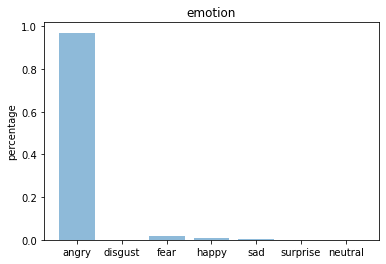

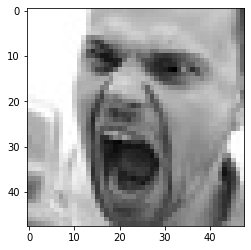

In [ ]:

file = 'PrivateTest_1221822.jpg'

facecrop(file)
true_image = image.load_img(file)
img = image.load_img(file,color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

predictions = model.predict(x) 

predictions = predictions.flatten()

custom = emotion_predict(predictions,x,true_image)